<a href="https://colab.research.google.com/github/maitreya-v/Audio-Classification-Librosa/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU found")

# Set TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)


Default GPU Device: /device:GPU:0
GPU memory growth enabled


In [3]:
import tensorflow as tf

# Check if a GPU is available and print its name
if tf.test.is_gpu_available():
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
    print("No GPU available")



Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Default GPU Device: /device:GPU:0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/audio

In [6]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
audio_df=pd.read_csv('./UrbanSound8K.csv')

In [97]:
audio_df.head(25)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [9]:
filename='/content/drive/MyDrive/audio/fold1/101415-3-0-2.wav'

data,sr=librosa.load(filename)

In [10]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [11]:
sr

22050

In [12]:
ipd.Audio(filename)

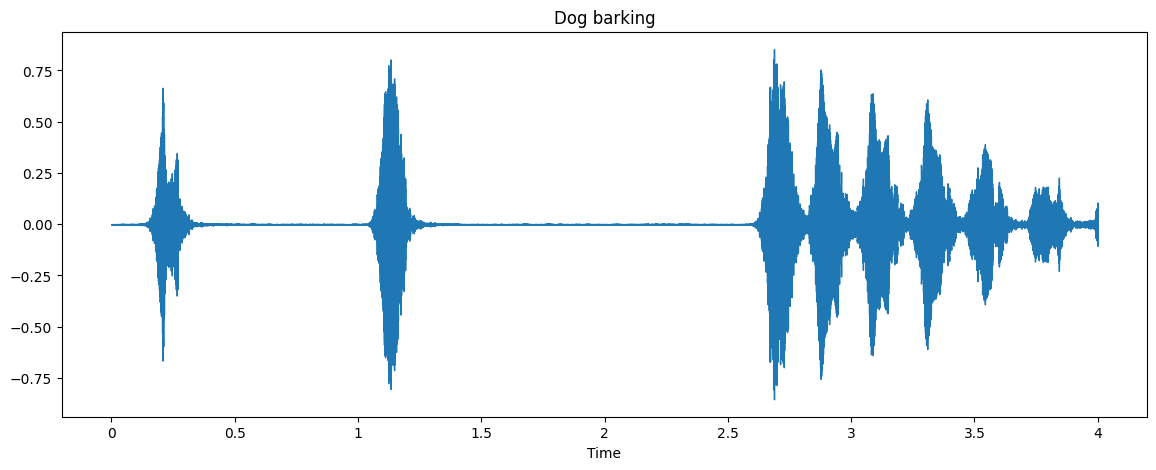

In [13]:
plt.figure(figsize=(14,5))
data,sr=librosa.load(filename)
librosa.display.waveshow(data,sr=sr)
plt.title('Dog barking')
plt.show()

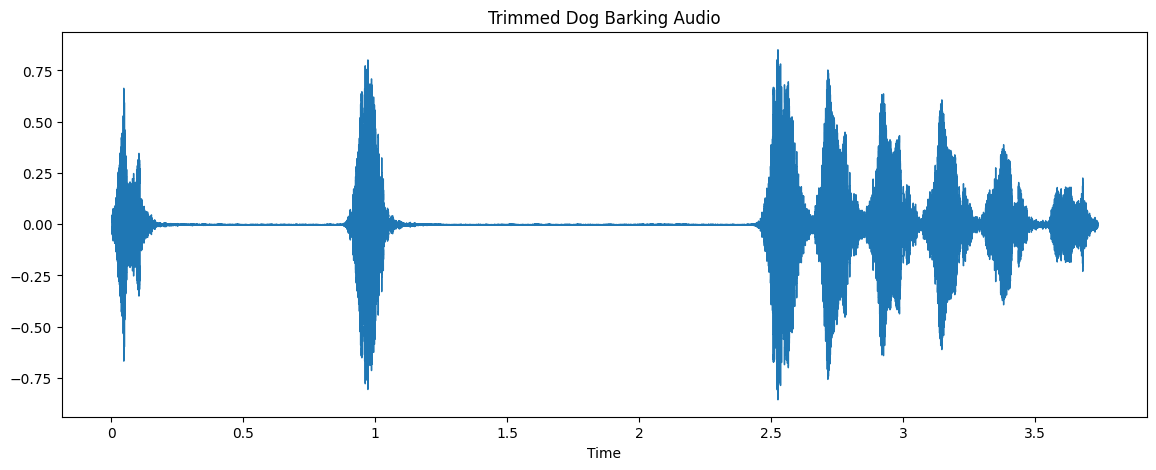

In [14]:
data_trimmed,unknown=librosa.effects.trim(data,top_db=20)
plt.figure(figsize=(14,5))
plt.title('Trimmed Dog Barking Audio')
librosa.display.waveshow(data_trimmed)

In [15]:
audio_df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [16]:
audio_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [17]:
mfcc_feature=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=20)

In [18]:
scaled_feature = np.mean(mfcc_feature.T,axis=0)
scaled_feature

array([-402.43027   ,   92.26344   ,   19.303583  ,  -13.194186  ,
         -5.8065734 ,    2.4085867 ,  -14.885645  ,   -8.070933  ,
         -9.417303  ,   -6.220677  ,    0.97337854,   -5.762092  ,
          1.6563416 ,    0.67246205,    0.96400744,    5.7375956 ,
          3.1241565 ,    3.0485227 ,   -4.208719  ,   -3.6097057 ],
      dtype=float32)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(mfcc_feature)

array([[-4.3569407 , -4.352619  , -4.3510423 , ..., -4.148976  ,
        -4.0010867 , -3.9175432 ],
       [ 0.28264374,  0.33563253,  0.33577046, ...,  1.3058491 ,
         1.7818949 ,  1.9812864 ],
       [ 0.2794796 ,  0.32680938,  0.3283954 , ...,  0.8145716 ,
         0.7129683 ,  0.6144907 ],
       ...,
       [ 0.19639774,  0.17900771,  0.16339327, ...,  0.16697341,
         0.16736487,  0.13025866],
       [ 0.19442877,  0.17989597,  0.16330358, ...,  0.1865136 ,
         0.15609662,  0.15143077],
       [ 0.19232057,  0.18073611,  0.16494903, ...,  0.12867132,
         0.10769583,  0.16999114]], dtype=float32)

In [20]:
audio_df.iloc[0]['slice_file_name']

'100032-3-0-0.wav'

In [21]:
def get_path(index):
  standard_path='/content/drive/MyDrive/audio/fold'
  folder_id=audio_df.iloc[index]['fold']
  filename=audio_df.iloc[index]['slice_file_name']
  full_path=str(standard_path) + str(folder_id) + '/' + str(filename)
  return full_path

In [22]:
# L=[]
# for index,row in tqdm(audio_df.iterrows()):
#     path=get_path(index)
#     data,sr=librosa.load(path)
#     mfcc_feature=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
#     mfcc_scaled_feature=sc.fit_transform(mfcc_feature)
#     df_dict={'feature':mfcc_scaled_feature,'class':row['class']}
#     L.append(df_dict)

In [23]:
# final_df=pd.DataFrame(L)
# L

In [24]:
# from google.colab import files
# final_df.to_csv('scaled_audio_feature.csv', index=False)
# files.download('scaled_audio_feature.csv')

In [28]:
try:
  final_df=pd.read_csv('./scaled_audio_features_jupyter.csv')
except ParseError:
  print('parse')  

In [29]:
final_df.head()

,features,class
0,[-2.1193698e+02 6.2581203e+01 -1.2281315e+02 ...,dog_bark
1,[-4.1700519e+02 9.9336624e+01 -4.2995586e+01 ...,children_playing
2,[-4.5239316e+02 1.1236253e+02 -3.7578068e+01 ...,children_playing
3,[-4.06479218e+02 9.11966019e+01 -2.50435581e+...,children_playing
4,[-4.3963867e+02 1.0386223e+02 -4.2658787e+01 ...,children_playing


In [30]:
def get_array(s):   
    s = s.strip('[]')
    s = s.split()

    s = [float(i) for i in s]

    arr = np.array(s)
    return arr
final_df['features']=final_df['features'].apply(get_array)
type(np.array(final_df['features'][0]))
X=final_df['features']
X.shape

(8732,)

In [31]:
X=np.array(final_df['features'].tolist())
y=np.array(final_df['class'].tolist())
# np.array(final_df['features'].tolist())

In [32]:
X[2].shape,X.shape,y[0],y.shape

((40,), (8732, 40), 'dog_bark', (8732,))

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le=LabelEncoder()
y=to_categorical(le.fit_transform(y))

In [37]:
y.shape

(8732, 10)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5850, 40), (2882, 40), (5850, 10), (2882, 10))

In [48]:
label_size=y.shape[1]
label_size

10

In [46]:
model=tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(40,)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs=100
batch_size=32
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer], verbose=1)
start = datetime.now()
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
180/183 [============================>.] - ETA: 0s - loss: 2.5485 - accuracy: 0.4108
Epoch 1: val_loss improved from inf to 1.37438, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 2s 8ms/step - loss: 2.5278 - accuracy: 0.4150 - val_loss: 1.3744 - val_accuracy: 0.5625
Epoch 2/100
173/183 [===========================>..] - ETA: 0s - loss: 1.3685 - accuracy: 0.5732
Epoch 2: val_loss improved from 1.37438 to 1.33638, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 1s 5ms/step - loss: 1.3714 - accuracy: 0.5737 - val_loss: 1.3364 - val_accuracy: 0.5847
Epoch 3/100
178/183 [============================>.] - ETA: 0s - loss: 1.0931 - accuracy: 0.6545
Epoch 3: val_loss improved from 1.33638 to 1.14013, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 1s 4ms/step - loss: 1.0925 - accuracy: 0.6549 - val_loss: 1.1401 - val_accuracy: 0.6589

In [56]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
test_accuracy[1]

0.899028480052948

In [74]:
predictions=model.predict(X_test)
predictions.shape 
predictions[0]

91/91 [==============================] - 0s 1ms/step


array([4.8016595e-09, 1.8165097e-10, 1.2239599e-11, 1.7616087e-07,
       6.8355415e-09, 2.6042530e-15, 1.3029454e-08, 1.0695004e-05,
       9.9998868e-01, 4.5893054e-07], dtype=float32)

In [64]:
#testing sample audio
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [102]:
filename='/content/drive/MyDrive/audio/fold7/99812-1-2-0.wav'
data,sr=librosa.load(filename)
data_features=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
scaled_features=np.mean(data_features.T,axis=0)
scaled_features=scaled_features.reshape(1,-1)
prediction=np.argmax(model.predict(scaled_features))
prediction = np.array(prediction, ndmin=1)
prediction_label=le.inverse_transform(prediction)
print(prediction_label[0])
ipd.Audio(filename)

1/1 [==============================] - 0s 28ms/step
car_horn


In [105]:
filename='/content/drive/MyDrive/audio/fold5/100852-0-0-0.wav'
data,sr=librosa.load(filename)
data_features=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
scaled_features=np.mean(data_features.T,axis=0)
scaled_features=scaled_features.reshape(1,-1)
prediction=np.argmax(model.predict(scaled_features))
prediction = np.array(prediction, ndmin=1)
prediction_label=le.inverse_transform(prediction)
print(prediction_label[0])
ipd.Audio(filename)

1/1 [==============================] - 0s 26ms/step
air_conditioner


In [104]:
filename='/content/drive/MyDrive/audio/fold10/100795-3-0-0.wav'
data,sr=librosa.load(filename)
data_features=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
scaled_features=np.mean(data_features.T,axis=0)
scaled_features=scaled_features.reshape(1,-1)
prediction=np.argmax(model.predict(scaled_features))
prediction = np.array(prediction, ndmin=1)
prediction_label=le.inverse_transform(prediction)
print(prediction_label[0])
ipd.Audio(filename)

1/1 [==============================] - 0s 32ms/step
dog_bark
